# Convolutional neural networks (CNNs) in `keras`

Lots of `keras` examples, some including CNNs available here: https://github.com/fchollet/keras/tree/master/examples

Specifically, this notebook is based on the following example training a CNN on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of hand-written digits: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow.contrib.keras as keras

In [2]:
%matplotlib inline

## Dataset pre-processing

In [3]:
# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# input image dimensions and class counts
img_rows, img_cols = 28, 28
num_classes = 10

In [4]:
x_train[0].shape

(28, 28)

In [5]:
y_train[0]

5

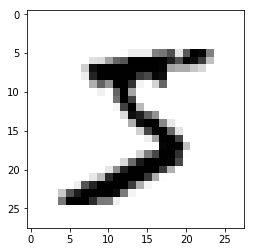

In [6]:
plt.imshow(x_train[0], cmap=cm.binary)

In [7]:
# images are expected as 3D tensors with the third dimension containing different image channels; reshape x to a
# 3D tensore with single color channel, the grayscale channel
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train[0].shape

(28, 28, 1)

In [8]:
# convert X to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
# convert to a one hot encoding of the class labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Specifying the CNN model

In [11]:
batch_size = 128
epochs = 5  # increasing this would probably make sense but takes longer to compute

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [16]:
keras.utils.plot_model(model, to_file='chapter_9_cnn.png', show_shapes=True)

![](chapter_9_cnn.png)

## Training the model

In [14]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 133s - loss: 0.3427 - acc: 0.8958 - val_loss: 0.0790 - val_acc: 0.9747
Epoch 2/5
60000/60000 [==============================] - 128s - loss: 0.1215 - acc: 0.9643 - val_loss: 0.0576 - val_acc: 0.9810
Epoch 3/5
60000/60000 [==============================] - 122s - loss: 0.0895 - acc: 0.9732 - val_loss: 0.0448 - val_acc: 0.9851
Epoch 4/5
60000/60000 [==============================] - 123s - loss: 0.0729 - acc: 0.9792 - val_loss: 0.0405 - val_acc: 0.9861
Epoch 5/5
60000/60000 [==============================] - 127s - loss: 0.0666 - acc: 0.9806 - val_loss: 0.0371 - val_acc: 0.9872


## Testing the model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0370507739768
Test accuracy: 0.9872
